<a href="https://colab.research.google.com/github/ThomasMcDaniel91/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [26]:
sum(sales) / len(sales)

3052.714285714286

In [8]:
#writing my function to get the variance
def data_variance(data):
  #changing the data type to an array
  data = np.array(data)
  #getting the mean of the data
  mean = sum(data) / len(data)
  #making a new list to append the values to
  new_data = []
  #looping over the values of the input list, subtracting the mean from it and squaring it then appends it to the list that i supplied.
  for i in data:
    x = (i - mean)**2
    new_data.append(x)
    #returns the variance with 1 degree of freedom.
  return (sum(new_data) / (len(data) - 1))
data_variance(sales)

214387.90476190473

In [27]:
#checking to make sure my function works properly.
np.var(sales, ddof=1)

214387.90476190473

In [28]:
def data_standard_dev(data):
  #turns my data into an array
  data = np.array(data)
  #gets the mean of the data
  mean = sum(data) / len(data)
  #creating an empty list to append values to
  new_data = []
  #loops over the items in input data to subtract the mean from them and square them
  #then appends the value to the new list
  for i in data:
    x = (i - mean)**2
    new_data.append(x)
    #gets the variance of the input data with 1 degree of freedom
  nd_mean = sum(new_data) / (len(new_data) -1)
  #gets the square root of the variance(standard deviation)
  return nd_mean ** 0.5

data_standard_dev(sales)


463.0204150595357

In [29]:
#checking my answer with the numpy library
np.std(sales, ddof=1)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [30]:
customers = [127, 80, 105, 92, 120, 115, 93]

np.cov(sales, customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [31]:
data_standard_dev(customers)

customers_sd = data_standard_dev(customers)
sales_sd = data_standard_dev(sales)
print(customers_sd)
print(sales_sd)

17.057326313123664
463.0204150595357


In [33]:
def cov(data1, data2):
  data1 = np.array(data1)
  data2 = np.array(data2)
  mean1 = np.mean(data1)
  mean2 = np.mean(data2)
  sd1 = data1 - mean1
  sd2 = data2 - mean2
  return sum((sd1 * sd2) / (len(data1) - 1))
cov(sales, customers)

7604.357142857143

In [36]:
covariance = cov(sales, customers)
covariance

7604.357142857143

In [37]:
corr = covariance / (customers_sd * sales_sd)
corr

0.962833977814891

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [40]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [43]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [44]:
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

A synonym for orthogonal would be perpendicular.

(-5.0, 5.0)

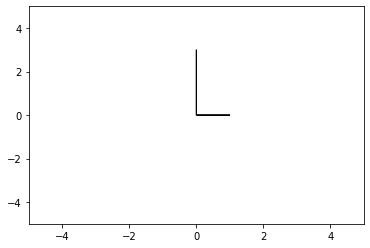

In [54]:
import matplotlib.pyplot as plt

vector1 = [0, 3]
vector2 = [1, 0]

fig, ax = plt.subplots()
plt.arrow(0, 0, vector1[0], vector1[1])
plt.arrow(0, 0, vector2[0], vector2[1])
ax.set_ylim(-5, 5)
ax.set_xlim(-5, 5)

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

The dot product is not == 0 therefore the vectors are not orthogonal.

In [56]:
a = [-5, 3, 7]
b = [6, -8, 2]
np.dot(a, b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

They are all the summation of the vector

In [0]:
c = np.array([2, -15, 6, 20])

In [65]:
c_sq = (np.linalg.norm(c)) **2
c_sq

665.0

In [66]:
np.dot(c, c)

665

In [67]:
ct = c.T
np.matmul(ct, c)

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11 \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + (-8)\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 2\hat{i} + 11\hat{j} + -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [75]:
f = np.array([4, 12, 11, 9, 2])
unit_f = f / np.linalg.norm(f)
unit_f

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

ERROR! Session/line number was not unique in database. History logging moved to new session 59


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

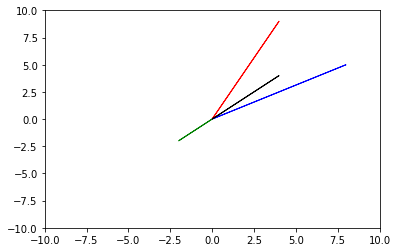

In [82]:
fig, ax = plt.subplots()
plt.arrow(0, 0, 8, 5, color='blue')
plt.arrow(0, 0, 4, 9, color = 'red')
plt.arrow(-2, -2, 2, 2, color='green')
plt.arrow(0, 0, 4, 4, color = 'black')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
#These vectors span 1 dimension because they have the same slope and if you multiply g by 4 then you will have the same vector as h

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
#The span of these vectors is 3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



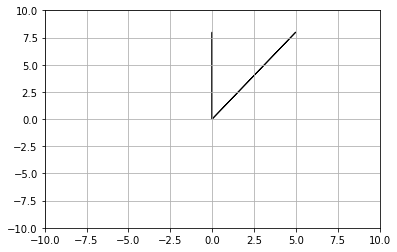

In [85]:
fig, ax = plt.subplots()
plt.arrow(0, 0, 5, 8)
plt.arrow(0, 0, 0, 8)
ax.set_ylim(-10, 10)
ax.set_xlim(-10, 10)
ax.grid()
plt.show()

## 6.2 What does it mean to form a basis?

To form a basis means to have 2 or more vectors that are independent and span that space and all points possible created by the 2 vectors are the basis.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

P has a rank of 3

## 7.2 What does the rank of a matrix tell us?

The rank of the matrix tells us how many independent vectors are in the matrix

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

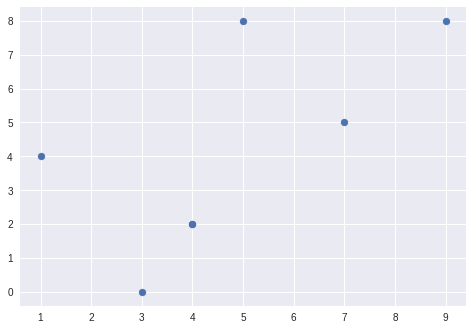

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()